In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('alaskan-earthquakes.csv')
df.head()

,magnitudes,infos,depths
0,3.6,"August 23, 2025 08:23 AM\r\n41 miles ENE of Po...",89 miles
1,3.5,"August 22, 2025 03:03 PM\r\n73 miles S of Sand...",14 miles
2,3.3,"August 21, 2025 10:20 PM\r\n24 miles SE of Bur...",2 miles
3,3.7,"August 21, 2025 04:18 PM\r\n26 miles SSE of Am...",13 miles
4,4.1,"August 20, 2025 12:35 PM\r\n12 miles NNW of Ne...",8 miles


In [3]:
# The "depths" column in this csv is made up of strings, but we want the miles as floats
numeric_depths = []

df = pd.read_csv('alaskan-earthquakes.csv')

for i in range(len(df['depths'])):
    split_depth = df['depths'][i].split(" ")
    num = float(split_depth[0])
    numeric_depths.append(num)

df["depths"] = numeric_depths

df.head()

,magnitudes,infos,depths
0,3.6,"August 23, 2025 08:23 AM\r\n41 miles ENE of Po...",89.0
1,3.5,"August 22, 2025 03:03 PM\r\n73 miles S of Sand...",14.0
2,3.3,"August 21, 2025 10:20 PM\r\n24 miles SE of Bur...",2.0
3,3.7,"August 21, 2025 04:18 PM\r\n26 miles SSE of Am...",13.0
4,4.1,"August 20, 2025 12:35 PM\r\n12 miles NNW of Ne...",8.0


In [4]:
# Now, we can see that the data about when and where the earthquakes happened is mixed into one column - so we will separate this

dates = []
locations = []

for i in range(len(df['infos'])):
    split_info = df['infos'][i].split("\r\n")
    date = split_info[0]
    location = split_info[1]
    #print("DATE: ", date)
    #print("LOCATION: ", location)
    dates.append(date)
    locations.append(location)

df['infos'] = dates
df = df.rename(columns={df.columns[1]: 'dates'})
df['locations'] = locations

df.head()

,magnitudes,dates,depths,locations
0,3.6,"August 23, 2025 08:23 AM",89.0,41 miles ENE of Port Alsworth
1,3.5,"August 22, 2025 03:03 PM",14.0,73 miles S of Sand Point
2,3.3,"August 21, 2025 10:20 PM",2.0,24 miles SE of Burwash Landing
3,3.7,"August 21, 2025 04:18 PM",13.0,26 miles SSE of Amchitka
4,4.1,"August 20, 2025 12:35 PM",8.0,12 miles NNW of Nenana


In [5]:
# lastly, we want to take the time and date information, and change it from a string into a datetime object - this will allow us to do things like sort most to lesat recent

new_dates=[]

for i in range(len(df['dates'])):
    new_date = datetime.strptime(df['dates'][i], '%B %d, %Y %H:%M %p')
    new_dates.append(new_date)

df['dates'] = new_dates

df.head()

,magnitudes,dates,depths,locations
0,3.6,2025-08-23 08:23:00,89.0,41 miles ENE of Port Alsworth
1,3.5,2025-08-22 03:03:00,14.0,73 miles S of Sand Point
2,3.3,2025-08-21 10:20:00,2.0,24 miles SE of Burwash Landing
3,3.7,2025-08-21 04:18:00,13.0,26 miles SSE of Amchitka
4,4.1,2025-08-20 12:35:00,8.0,12 miles NNW of Nenana


In [6]:
df.describe(include='all')

,magnitudes,dates,depths,locations
count,4866.000000,4866,4866.000000,4866
unique,NaN,NaN,NaN,3418
top,NaN,NaN,NaN,78 miles W of Adak
freq,NaN,NaN,NaN,25
mean,4.026552,2020-10-20 11:05:15.104808960,13.861282,NaN
min,0.500000,2014-01-02 14:02:00,0.000000,NaN
25%,3.600000,2018-08-12 15:30:00,0.000000,NaN
50%,3.900000,2021-05-20 06:05:00,7.000000,NaN
75%,4.300000,2023-07-01 03:35:45,17.000000,NaN
max,8.200000,2025-08-23 08:23:00,179.000000,NaN


In [7]:
# Now we can double check that all of our columns are in the correct datatype and there are no null cells in our df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4866 entries, 0 to 4865
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   magnitudes  4866 non-null   float64       
 1   dates       4866 non-null   datetime64[ns]
 2   depths      4866 non-null   float64       
 3   locations   4866 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 152.2+ KB


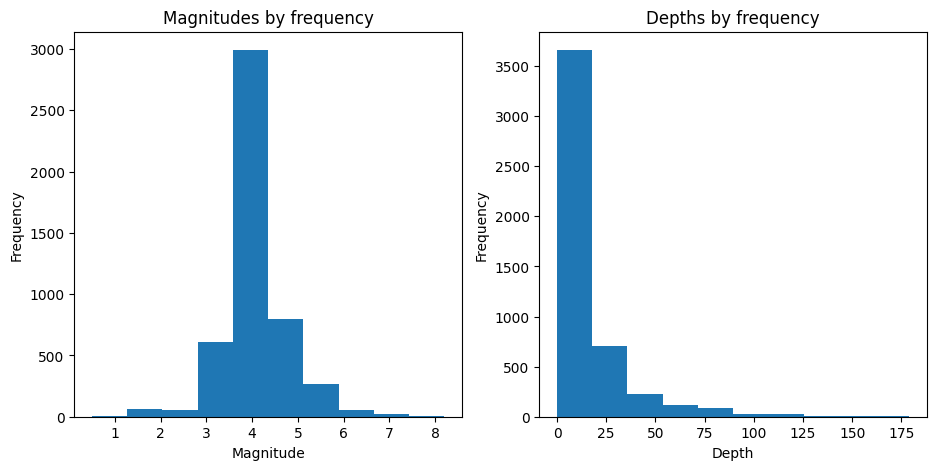

In [8]:
plt.figure(figsize=(11,5))

plt.subplot(1, 2, 1)
plt.hist(df['magnitudes'])
plt.title('Magnitudes by frequency')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.subplot(1, 2, 2)
plt.hist(df['depths'])
plt.title('Depths by frequency')
plt.ylabel('Frequency')
plt.xlabel('Depth')

plt.show()

# This will give us a brief visualization of our magnitude and depths data 
# It looks like the depths data might need a closer look to get a better idea of what's going on
    # Our depths data has a lot of "0" values in it, which come from pre-2018 data where the depths may not have been recorded
    # In addition, the range is quite large, but there doesn't seem to be too much data after about 75 - 100 miles
    # Let's zoom in on some of the depths data and restrict the x-limits to get a better representation of the data

Text(0.5, 0, 'Depth')

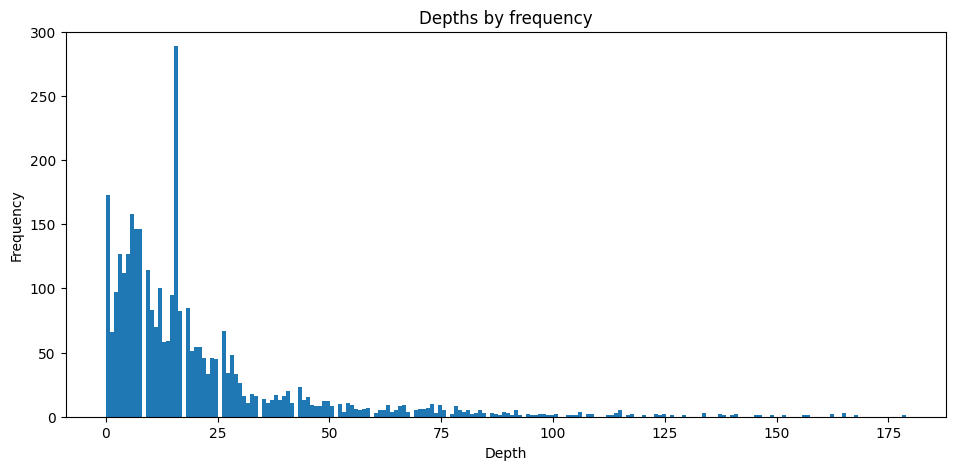

In [9]:
plt.figure(figsize=(25, 5))

# let's split the data so we only get the data from 2019 on
row_num = df[df['dates'] == '2019-01-01 01:10:00'].index

df = df[:row_num[0]]

# now we can graph the depths data that we'll use for the rest of the analysis
plt.subplot(1, 2, 2)
plt.hist(df['depths'], bins=200)
plt.ylim(0, 300)
plt.title('Depths by frequency')
plt.ylabel('Frequency')
plt.xlabel('Depth')

# Now we can get a better idea of the depths data for the timeframe that it exists in our dataset
# it looks like even by removing the dates that don't have depth data, the majority of the data is still hovering below 20 miles

In [10]:
# creating a list of data frames for each year, 2019 - 2025

years = []
j = 2019
for i in range(7):
    temp = df.copy()[(df['dates'].dt.year == j+i)]
    years.append(temp)
    
print(years[0])


      magnitudes               dates  depths                     locations
2880         4.6 2019-12-31 18:20:00    26.0            25 miles S of Adak
2881         3.5 2019-12-30 05:04:00     7.0        29 miles NW of Rampart
2882         3.8 2019-12-30 04:23:00     5.0        28 miles NW of Rampart
2883         3.5 2019-12-24 03:22:00     7.0      59 miles SW of Kantishna
2884         3.6 2019-12-23 21:52:00    26.0        15 miles NW of Chugiak
...          ...                 ...     ...                           ...
3287         3.3 2019-01-01 02:12:00     4.0        159 miles SE of Kodiak
3288         2.8 2019-01-01 01:55:00    14.0       33 miles SW of Kaktovik
3289         1.6 2019-01-01 01:48:00    31.0        13 miles NW of Chugiak
3290         1.8 2019-01-01 01:20:00    21.0         29 miles NE of Sutton
3291         2.1 2019-01-01 01:17:00    26.0  13 miles NW of Elmendorf AFB

[412 rows x 4 columns]


Text(0.5, 0, 'Magnitude')

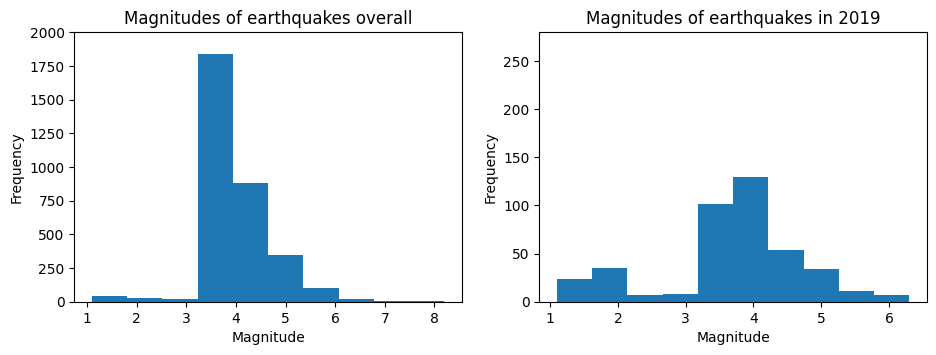

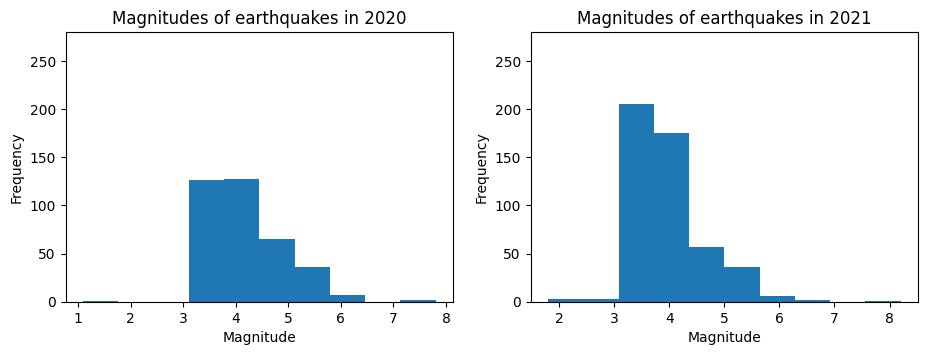

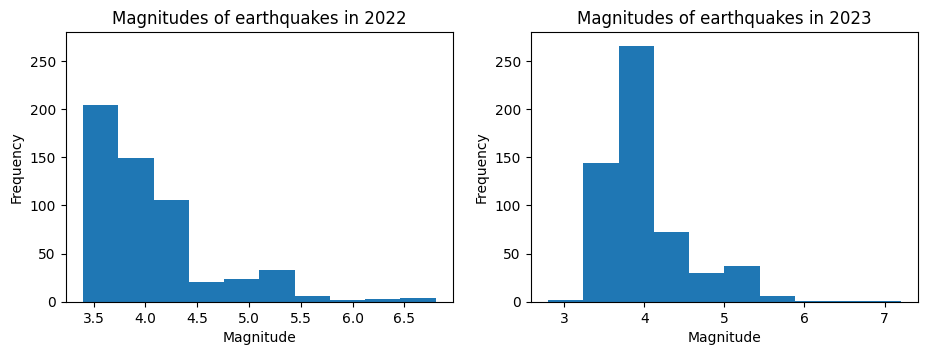

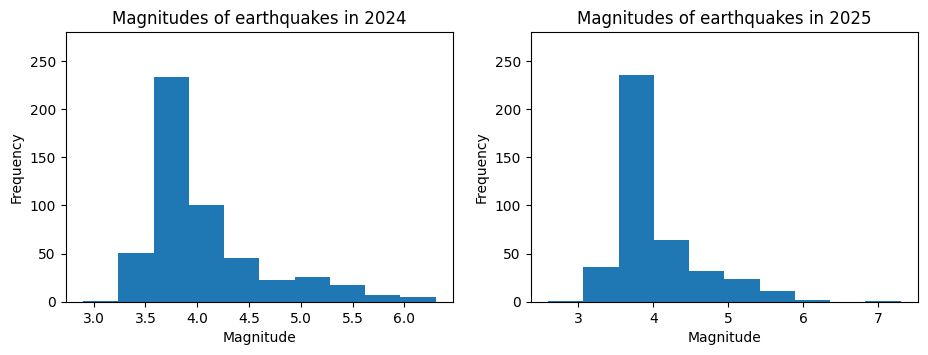

In [11]:
# this will allow us to see the different megnitudes of earthquakes across the years - it looks like very few of the earthquakes have been less than 3.5 in magnitude

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(df['magnitudes'])
plt.ylim(0,2000)
plt.title('Magnitudes of earthquakes overall')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.subplot(1, 2, 2)
plt.hist(years[0]['magnitudes'])
plt.ylim(0,280)
plt.title('Magnitudes of earthquakes in 2019')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.figure(figsize=(11,3.5))
plt.subplot(1, 2, 1)
plt.ylim(0,280)
plt.hist(years[1]['magnitudes'])
plt.title('Magnitudes of earthquakes in 2020')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.subplot(1, 2, 2)
plt.hist(years[2]['magnitudes'])
plt.ylim(0,280)
plt.title('Magnitudes of earthquakes in 2021')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.figure(figsize=(11,3.5))
plt.subplot(1, 2, 1)
plt.hist(years[3]['magnitudes'])
plt.ylim(0,280)
plt.title('Magnitudes of earthquakes in 2022')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.subplot(1, 2, 2)
plt.hist(years[4]['magnitudes'])
plt.ylim(0,280)
plt.title('Magnitudes of earthquakes in 2023')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.figure(figsize=(11,3.5))
plt.subplot(1, 2, 1)
plt.hist(years[5]['magnitudes'])
plt.ylim(0,280)
plt.title('Magnitudes of earthquakes in 2024')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.subplot(1, 2, 2)
plt.hist(years[6]['magnitudes'])
plt.ylim(0,280)
plt.title('Magnitudes of earthquakes in 2025')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

In [22]:
year_data = df['dates'].dt.year

df["year"] = year_data

In [25]:
df.head()

,magnitudes,dates,depths,locations,year
0,3.6,2025-08-23 08:23:00,89.0,41 miles ENE of Port Alsworth,2025
1,3.5,2025-08-22 03:03:00,14.0,73 miles S of Sand Point,2025
2,3.3,2025-08-21 10:20:00,2.0,24 miles SE of Burwash Landing,2025
3,3.7,2025-08-21 04:18:00,13.0,26 miles SSE of Amchitka,2025
4,4.1,2025-08-20 12:35:00,8.0,12 miles NNW of Nenana,2025


In [26]:
earthquakes_per_year = df['year'].value_counts().sort_index()

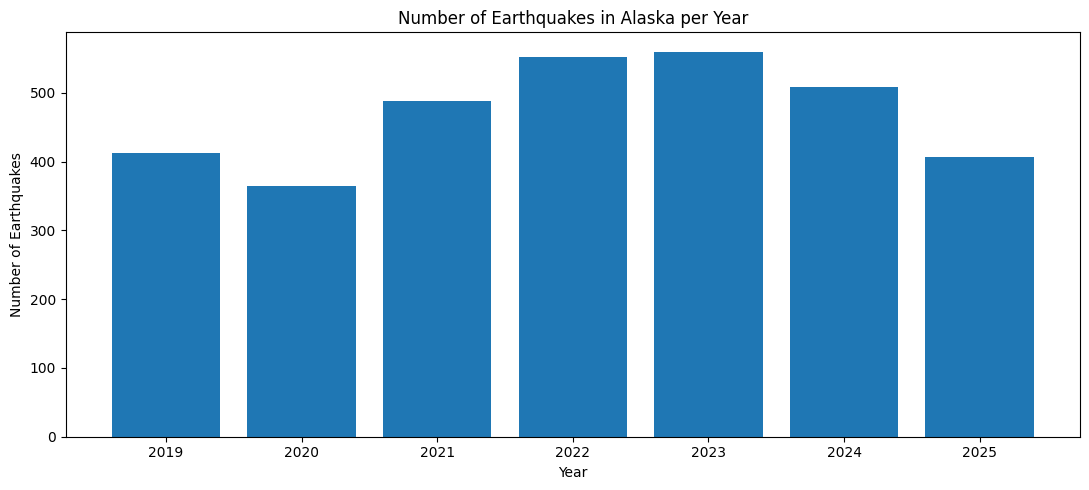

In [31]:
plt.figure(figsize=(11,5))
plt.bar(earthquakes_per_year.index, earthquakes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes in Alaska per Year')
plt.tight_layout()
plt.show()